# Summary
1. [Introduction & Business Problem](#1.-Introduction-&-Business-Problem)
2. [Data](#2.-Data)
3. [Data Preparation & Cleaning](#3.-Data-Preparation-&-Cleaning)
6. [Modeling](#4.-Modeling)
8. [Conclusions](#8.-Conclusions)

# 1. Introduction & Business Problem 

### 1.1 Background
Various types of transportation are available to move around. Evidence shows that vehicles like cars, vans and trucks represent the main types of transportation in our society and that the vast majority of people within each country use a car on a daily basis. Thus, **car safety** is an important issue, for drivers, cyclists and pedestrians. Car collisions can be severe and end or badly impact people’s lives, or less serious and cost the people involved a lot of money.
Data released by WHO (World Health Organisation) on the 7th Feb 2020 reveals some alarming trends. On the globe, every year:
 
- 1.35 million people die as a result of a car accident.
- 20 to 50 million people suffer non-fatal injuries.
- Minor injuries cause considerable economic losses to individuals and countries.
- Car accidents cost most countries app. 3% of their entire GDP.

These numbers clearly indicate that a final solution to this problem has not been found yet. In order to address this topic, it is essential to collect relevant data and explore the various factors that can impact people’s safety while driving (unsafe road infrastructure, speed, distraction, driving under the influence of alcohol or other substances, as well as the light and weather condition).

### 1.2. Research Goals
This research has two main goals:

- Creating a **predictive model for car accident severity** by analysing and working with a dataset released by the city of Seattle, U.S.A. This set contains data relating to external factors (such as road conditions, weather, ...) as well as factors associated with drivers behaviour (speeding, driving under the influence of alcohol and substances, ... ). The accuracy of various algorithm (such as: Decision Tree, Logistic Regression, Key Nearest Neighbours and Support Vector Machine) will be tested out to find the best performing one.

- Analysing the data contained in this dataset to explore the factors that impact accident severity with the intent to **share the collected information with the general population**, in order to improve their sense of awareness of the risks involved while driving.


### 1.3 Interest
This project is directed to:

- The **general public**, who is interested in the topic to improve their safety while driving.
- **Governments** and **private companies**: these entities could be interested in further improving the project content and develop mobile applications to inform drivers and positively impact their behaviour on the road. An alert system could inform drivers on their level of risk of being involved in an accident given their specific circumstances. As a response, well-informed drivers could choose to drive more carefully or change route, thus reducing the overall risk of causing/being involved in a car collision.

# 2. Data

### 2.1 Dataset Overview
The dataset used in this project is the shared dataset provided by IBM on the course <a href="https://www.coursera.org/professional-certificates/ibm-data-science">IBM-Data-Science</a> and it contains detailed data relating to accident severity provided by the State Police Department of Seattle, U.S.A. The collected information was recorded on a weekly basis from 2004 until today. The version provided by the course is slightly modified, but the overall content is similar.
The dataset provided on the course is also available on the open data portal of the <a href=http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data> City of Seattle</a>. It includes:

- **39 input attributes** which contain detailed information about the recorded accidents. Some features will be used to train the predictive models and others disregarded, based on their importance for model creation. 
- **1 output attribute**: the car accident severity evaluation, which includes all the types of collisions displayed at the intersection or mid-block of a segment, which are divided into five different categories.

A brief description of these attributes is shown below:


OUPUT VARIABLE      | DESCRIPTION   
:------------------:|:-----------
**SEVERITY CODE**   |This includes the codes that correspond to the severity of a recorded collision:
                    |  • **3** = Fatality
                    |  • **2b** = Serious Injury
                    |  • **2** = Injury
                    |  • **1** = Prop Damage
                    |  • **0** = Unknown
  

INPUT VARIABLES    | DESCRIPTION   
:-------------------|:-----------
**X**                |Location, longitude.
**Y**                |Location, latitude. 
**OBJECTID**         |The ESRI unique identifier.      
**INCKEY**           |A unique key for the accident.
**COLDETKEY**        |A secondary key for the accident.
**REPORTNO**         |The number of the reported accident.
**STATUS**           |Not Specified.
**ADDRTYPE**         |The collision address type (Alley, Block, Intersection).
**INTKEY**           |A key that corresponds to the intersection associated with a collision.
**LOCATION**        |The description of the general location of the collision.
**EXCEPTRSNCODE**   |Not specified.
**EXCEPTRSNDESC**   |Not specified.
**SEVERITYDESC**    |Detailed description of the severity of the collision.
**COLLISIONTYPE**   |Collision type.
**PERSONCOUNT**     |The total number of people involved in the collision.
**PEDCOUNT**        |The number of pedestrians involved in the collision.
**PEDCYLCOUNT**     |The number of bicycles involved in the collision.
**VEHCOUNT**        |The number of vehicles involved in the collision.
**INJURIES**        |The number of injuries in the collision.
**SERIOUSINJURIES** |The number of serious injuries in the collision.
**FATALITIES**      |The number of fatalities in the collision.
**INCDATE**         |The date of the incident.
**INCDTTM**         |The date and time of the incident.
**JUNCTIONTYPE**    |Category of junction at which collision took place.
**SDOT_COLCODE**    |A code given to the collision by SDOT.
**SDOT_COLDESC**    |A description of the collision corresponding to the collision code.
**INATTENTIONIND**  |Whether or not collision was due to inattention (Y/N).
**UNDERINFL**       |Whether or not a driver involved was under the influence of drugs or alcohol.
**WEATHER**         |A description of the weather conditions during the time of the collision.
**ROADCOND**        |The condition of the road during the collision.
**LIGHTCOND**       |The light conditions during the collision.
**PEDROWNOTGRNT**   |Whether or not the pedestrian right of way was not granted (Y/N).
**SDOTCOLNUM**      |A number given to the collision by SDOT.
**SPEEDING**        |Whether or not speeding was a factor in the collision (Y/N).
**ST_COLCODE**      |A code provided by the state that describes the collision.
**ST_COLDESC**      |A description that corresponds to the state’s coding designation.
**SEGLANEKEY**      |A key for the lane segment in which the collision occurred.
**CROSSWALKKEY**    |A key for the crosswalk at which the collision occurred.
**HITPARKEDCAR**    |Whether or not the collision involved hitting a parked car (Y/N).

### 2.2 Libraries
The libraries required for this project are imported.

In [1]:
import numpy as np                                   # Linear algebra / calculations
import pandas as pd                                  # Data processing / DataFrames 
import os                                            # To check directory content

import matplotlib as mpl                             # Data Visualisation
import matplotlib.pyplot as plt                      # Data Visualisation
import seaborn as sns                                # Data Visualization
%matplotlib inline                                   

import calendar                                      
import folium                                        # Interactive Maps
from folium import plugins                           # Interactive Maps
from folium.plugins import MarkerCluster             # To use Markers in the map
from IPython.display import Image                    # To Visualise images

import itertools                                     # A module with iterator building blocks 
from sklearn import preprocessing                    # To transform data
from sklearn.preprocessing import StandardScaler     # To Scale Data
from sklearn.model_selection import train_test_split # To split data into Test/Train

from sklearn.tree import DecisionTreeClassifier      # To create a Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # To create a Logistic Classifier
from sklearn.neighbors import KNeighborsClassifier   # To create a KNN Classifier
from sklearn import svm                              # To create a SVM Classifier

from sklearn.metrics import accuracy_score           # To test the model accuracy 
from sklearn.metrics import balanced_accuracy_score  # To test the model balanced accuracy
from sklearn.metrics import confusion_matrix         # To obtain the confusion matrix
from sklearn.metrics import classification_report    # To create the classification report

### 2.3 Data Ingestion
Data is downloaded and ingested into a Pandas dataframe. 

In [2]:
display(os.listdir(), os.getcwd())      # Working directory 

['.DS_Store',
 'PRESENTATION.pdf',
 'NOTEBOOK_CAR_ACCIDENT_SEVERITY.pdf',
 'README.md',
 'NOTEBOOK_CAR_ACCIDENT_SEVERITY.ipynb',
 'Collisions.csv',
 '.gitattributes',
 '.ipynb_checkpoints',
 '.git',
 'REPORT.pdf']

'/Users/riccardobellio/Desktop/projects/Coursera_Capstone_Project'

In [3]:
# Data ingestion
data = pd.read_csv('/Users/riccardobellio/Desktop/projects/Coursera_Capstone_Project/Collisions.csv', low_memory=False)

In [4]:
data.head(2)  # To visualise the first row of the datatset

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N


# 3. Data Preparation & Cleaning
The dataset contains information that are not relevant for the purpose of this project. By simply looking at the attribute description contained in the previous table, it is possible to assess what features can be discarded. The following table contains the list of attributes that will be discarded and the dropping reason.


ATTRIBUTE           | DROPPING REASON   
:-------------------|:-------------------
**OBJECTID**        |ESRI unique indentifier, irrelevant to predict the labeled data. Kept to perform some 
                    |groupby operations. Then dropped
**INCKEY**          |Unique accident key, irrelevant to predict the labeled data
**COLDETKEY**       |Secondary accident key, irrelevant to predict the labeled data 
**INTKEY**          |Unknown key corrisponding to the intersection for the collision, irrelevant for prediction 
**SEGLANEKEY**      |Unknown Key corrisponding to the lane segment for the collision, irrelevant for prediction
**CROSSWALKKEY**    |Unknown key corrisponding to the crosswalk for the collision, irrelevant for prediction
**EXCEPTRSNCODE**   |Unknown key which is not specified, irrelevant to predict the labeled data
**REPORTNO**        |Unknown key, irrelevant to predict the labeled data
**STATUS**          |Unknown key, irrelevant to predict the labeled data
**SDOTCOLNUM**      |Unknown key, irrelevant to predict the labeled data
**SDOT_COLDESC**    |A description of the collision, irrelevant to predict the labeled data
**ST_COLDESC**      |A description of the state’s coding designation, irrelevant to predict the labeled data
**EXCEPTRSNDESC**   |A non-specified description, irrelevant to predict the labeled data
**LOCATION**        |A descrition of the location of the accident, irrelevant to predict the labeled data 
**SDOT_COLCODE**    |A code of the collision provided by SDOT, already contained in ST_COLCODE
**ST_COLCODE**      |A code of the collision, irrelevant to predict the labeled data
**INCDATE**         |Accident date, already contained in INCDTTM, double entry
**INJURIES**        |Information contained in the label data, not relevant
**SERIOUSINJURIES** |Information contained in the label data, not relevant
**FATALITIES**      |Information contained in the label data, not relevant

In [5]:
# Drop attributes
data.drop(['INCKEY', 'COLDETKEY', 'INTKEY', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True) 
data.drop(['EXCEPTRSNCODE', 'REPORTNO', 'STATUS', 'SDOTCOLNUM'], axis=1, inplace=True)
data.drop(['SDOT_COLDESC', 'ST_COLDESC', 'EXCEPTRSNDESC', 'LOCATION'], axis=1, inplace=True)
data.drop(['SDOT_COLCODE', 'ST_COLCODE'], axis=1, inplace=True)
data.drop(['INCDATE'], axis=1, inplace=True)
data.drop(["INJURIES", "SERIOUSINJURIES", "FATALITIES"], axis=1, inplace=True)

Columns headers are renamed for clarity.

In [6]:
data.rename(columns={'ADDRTYPE':'CRASH_LOC_TYPE', 'SEVERITYCODE':'SEVERITY_CODE', 
                   'COLLISIONTYPE':'CRASH_TYPE','PERSONCOUNT':'PERSON_COUNT',
                   'PEDCOUNT':'PEDESTRAIN_COUNT','PEDCYLCOUNT':'BYCICLE_COUNT',
                   'VEHCOUNT': 'VEHICLE_COUNT','SEVERITYDESC':'SEVERITY_DESC',
                   'JUNCTIONTYPE': 'JUNCTION_TYPE', 'INATTENTIONIND':'INATTENTION',
                   'UNDERINFL':'SUBSTANCES', 'ROADCOND':'ROAD_CONDITION',
                   'LIGHTCOND':'LIGHT_CONDITION', 'PEDROWNOTGRNT':'PEDESTRAIN_GRANTED',
                   'SPEEDING':'SPEEDING','HITPARKEDCAR':'HIT_PARKED_CAR'}, inplace=True)

### 3.1 Extracting Time, Day, Month and Year

It is important to extract the **time, day of the week, month** and **year** of the recorded accidents. This information is contained in the attribute `INCDTTM`: it will be extracted into separate columns to explore them individually and try to identify meaningful patterns. The new feature **Time** will converted in **parts of the day** for simplicity:

  | TIME (HOURS)   | PART OF THE DAY 
  |:-------:|:----------:
  | 0 - 6   | Night 
  | 6 - 12  | Morning
  | 12 - 18 | Afternoon
  | 18 - 24 | Evening 

In [7]:
data["INCDTTM"] = pd.to_datetime(data["INCDTTM"])                         # Create datetime Column
data["TIME"] = pd.cut(data["INCDTTM"].dt.hour, bins = [0,6,12,18,24]
                      ,labels=['Night','Morning','Afternoon','Evening'])  # Daily 
data["WEEK_DAY"] = data["INCDTTM"].dt.weekday                             # Weekly
data['WEEK_DAY'] = data['WEEK_DAY'].apply(lambda x: calendar.day_abbr[x]) # Change numers into day names
data["MONTH"] = data["INCDTTM"].dt.month                                  # Month
data['MONTH'] = data['MONTH'].apply(lambda x: calendar.month_abbr[x])     # Change numbers into month names
data["YEAR"] = data["INCDTTM"].dt.year                                    # Yearly
data.drop(['INCDTTM'], axis=1, inplace=True)                              # Drop INCDTTM

### Daily, Weekly, Monthly and Yearly Accident Distribution

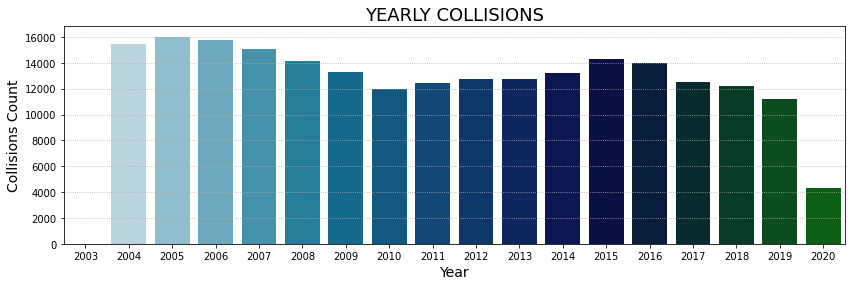

In [8]:
fig, ax = plt.subplots(figsize=(14,4))
ax = sns.countplot(x = data["YEAR"],ax=ax, palette ='ocean_r')
ax.set_title("YEARLY COLLISIONS", fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
plt.grid(axis='y',  linestyle=':')
plt.show()

Yearly distribution show a downtrend from 2006 to 2010 and from 2015 to 2019. Data for 2020 shows a significant drop because the year is not finished yet.

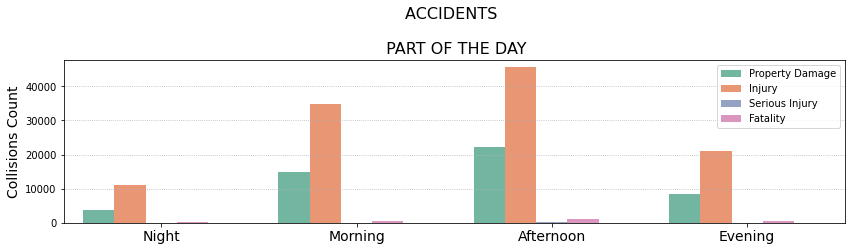

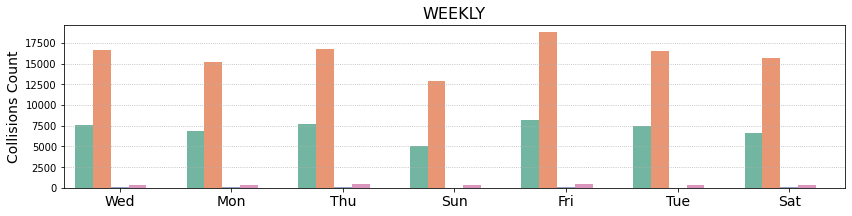

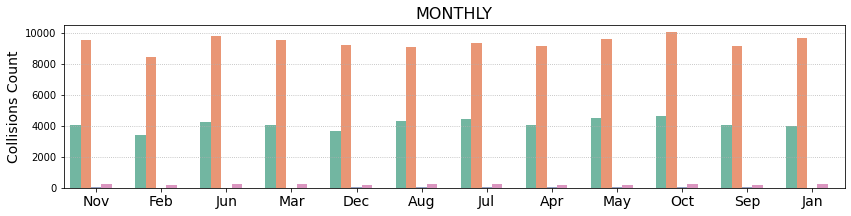

In [9]:
data.drop(['YEAR'], axis=1, inplace=True)
data.dropna(axis=0, how='any',thresh=None, subset=['TIME'], inplace=True)  # Drop Nan
# Plot_1: Daily
plt.figure(figsize=(14,3))
ax = sns.countplot(x= "TIME", hue='SEVERITY_CODE', data=data, palette = "Set2")
ax.set_title('ACCIDENTS \n\n PART OF THE DAY', size = 16)                  
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_xlabel(xlabel = None)
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y',  linestyle=':')
#Plot_2: Weekly
plt.figure(figsize=(14,3))
ax = sns.countplot(x= "WEEK_DAY", hue='SEVERITY_CODE', data=data, palette = "Set2")
ax.set_title('WEEKLY', size = 16)                   
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
ax.set_xlabel(xlabel = None)
ax.legend().set_visible(False)
plt.grid(axis='y',  linestyle=':')
# Plot_3: Monthly
plt.figure(figsize=(14,3))
ax = sns.countplot(x= "MONTH", hue='SEVERITY_CODE', data=data, palette = "Set2")
ax.set_title('MONTHLY', size = 16)                 
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
ax.set_xlabel(xlabel = None)
ax.legend().set_visible(False)
plt.grid(axis='y',  linestyle=':')

plt.show()

Accident severity show a similar distribution on a daily, weekly and monthly basis. 
- Time of the day impacts accident severty, with a higher rate of accident in the `afternoon`. This is probably due to the fact that there are more people on the road at that time of the day: after work, children school pick-ups, shopping.
- Day of the week influences accident severity: `Friday` is the day with the highest rate.
- `October`, `November`, `January` and `June` are the worst months.

Attributes will be explored individually in order to better understand how they impact accident severity distribution. The presence of `Nan` values or other irrelevant data will be inspected column by column.

### 3.2 Labeled data

The attribute `SEVERITY_DESC` contains a description of the accidents and `SEVERITY_CODE` contains a code for each type of accident.

In [10]:
data["SEVERITY_DESC"].value_counts().to_frame('COUNT')

,COUNT
Property Damage Only Collision,112392
Injury Collision,49475
Serious Injury Collision,2588
Fatality Collision,275
Unknown,6


In [11]:
data["SEVERITY_CODE"].value_counts().to_frame('COUNT')

,COUNT
1,112392
2,49475
2b,2588
3,275
0,5


To improve our labeled data:
- **21636 unknown (0)** entries are dropped: unknown data is not relevant for model prediction.
- `SEVERITY_DESC` is dropped from the dataset: its information is contatined in `SEVERITY_CODE`.
- The value scale is changed for clarity: **3** entries are converted into **4** entries and **2b** into **3**. The new scale is:

VALUE | INJURY DESCRITPION   
:----:|:----------:
1     | Property Damage Only
2     | Injury
3     | Serious Injury
4     | Fatality 

  |SELECTED FEATURES   
  |:----------
  |Type of junction.
  |Type of accident location.
  |Weather, road and light conditions.
  |Speeding.
  |Driving under the influence of alcohol or drugs.
  |Inattention while driving.
  |Whether pedestrians were granted or not. 
  |Collision time, day and month.

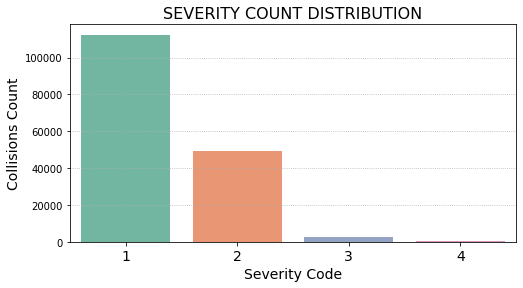

In [12]:
data["SEVERITY_CODE"].replace('0', np.nan, inplace= True)                           # Replace with nan values
data.dropna(axis=0, how='any',thresh=None, subset=['SEVERITY_CODE'], inplace=True)  # Drop Nan values
data['SEVERITY_CODE'].replace('3', '4', inplace=True)                               # 3-->4
data['SEVERITY_CODE'].replace('2b', '3', inplace=True)                              # 2b-->3
data['SEVERITY_CODE'] =  data['SEVERITY_CODE'].astype('int64')                      # Set type int64
data.drop(['SEVERITY_DESC'], axis=1, inplace=True)                                  # Drop SEVERITY_DESC

plt.figure(figsize=(8,4))                                               # Size
ax = sns.countplot(x = "SEVERITY_CODE", data=data, palette = "Set2")    # Seaborn countplot
ax.set_title('SEVERITY COUNT DISTRIBUTION', size = 16)                  # Title
ax.set_xlabel(xlabel = "Severity Code", size = 14)                      # X_labels
ax.set_ylabel(ylabel = "Collisions Count", size = 14)                   # Y_labels
ax.set_xticklabels(ax.get_xticklabels(), size = 14)                     # X_tick_labels
plt.grid(axis='y',  linestyle=':')                                      # Grid style
plt.show()

**Note**: The dataset is **extremely imbalanced** because the vast majority of the data refers to **Property Damage Only Collisions** and **Injury Collisions**. Algorithms used in classification problems are badly affected by imbalanced data. Data will have to be balanced out to improve model quality.

### 3.3 Inspect Null values column by column

In [13]:
data.isnull().sum()

X                       4360
Y                       4360
OBJECTID                   0
CRASH_LOC_TYPE          1571
SEVERITY_CODE              0
CRASH_TYPE                21
PERSON_COUNT               0
PEDESTRAIN_COUNT           0
BYCICLE_COUNT              0
VEHICLE_COUNT              0
JUNCTION_TYPE           5567
INATTENTION           137841
SUBSTANCES                 0
WEATHER                  193
ROAD_CONDITION           124
LIGHT_CONDITION          282
PEDESTRAIN_GRANTED    160248
SPEEDING              156710
HIT_PARKED_CAR             0
TIME                       0
WEEK_DAY                   0
MONTH                      0
dtype: int64

Some attributes present lots of `Nan` values. The dataset is quite big, so these values can be dropped if not necessary.

### CRASH_LOC_TYPE

In [14]:
data["CRASH_LOC_TYPE"].value_counts().to_frame()

,CRASH_LOC_TYPE
Block,105822
Intersection,56731
Alley,606


`Nan` refers to missing values (1571 in total). It can be dropped. 

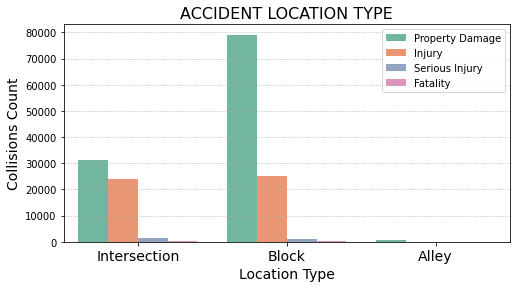

In [15]:
data.dropna(axis=0, how='any',thresh=None, subset=['CRASH_LOC_TYPE'], inplace=True)       

plt.figure(figsize=(8,4))                                 
ax = sns.countplot(x= "CRASH_LOC_TYPE", hue='SEVERITY_CODE', data=data, palette = "Set2")
ax.set_title('ACCIDENT LOCATION TYPE', size = 16)                   
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_xlabel(xlabel = "Location Type", size = 14)
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y',  linestyle=':')
plt.show()

**Property damage** accidents peaks at blocks. **Fatalities** do not take place at alleys.

### CRASH_TYPE

In [16]:
data["CRASH_TYPE"].value_counts().to_frame().T

,Parked Car,Angles,Rear Ended,Other,Sideswipe,Left Turn,Pedestrian,Cycles,Right Turn,Head On
CRASH_TYPE,38629,30624,29393,19745,16171,12116,6731,5268,2580,1881


`Nan` refers to missing values and will be removed (21 values). `Other` values (19745 entries) are not relevant for prediction and will be dropped. 

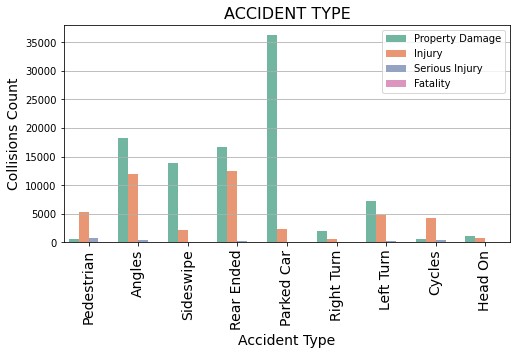

CRASH_TYPE,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
SEVERITY_CODE,,,,,,,,,
False,30601,5249,1866,12101,38623,6624,29383,2579,16161
True,23,19,15,15,6,107,10,1,10


In [17]:
data["CRASH_TYPE"].replace("Other", np.nan, inplace=True)                        # Convert "Other" to "nan" 
data.dropna(axis=0, how='any',thresh=None, subset=['CRASH_TYPE'], inplace=True)  # Drop Nan

plt.figure(figsize=(8,4))                                
ax = sns.countplot(x= "CRASH_TYPE", hue='SEVERITY_CODE', data=data, palette = "Set2")
ax.set_title('ACCIDENT TYPE', size = 16)  
ax.set_xlabel(xlabel = "Accident Type", size = 14)
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y')
plt.show()

pd.crosstab(data.CRASH_TYPE, data.SEVERITY_CODE==4).T            # Number of fatalties divided by accident types

- **Property damage** peaks when a parked car is involved.
- **Injuries** are the product of different types of collisions, mainly **rear ended** and **angles**.
- **Fatalties** peak when accidents involve pedestrians (129).

### JUNCTION_TYPE

In [18]:
data["JUNCTION_TYPE"].value_counts().to_frame()

,JUNCTION_TYPE
Mid-Block (not related to intersection),64440
At Intersection (intersection related),51585
Mid-Block (but intersection related),15738
Driveway Junction,6034
At Intersection (but not related to intersection),1672
Ramp Junction,124
Unknown,3


`Nan` (5567 entries) and `Unknown` (3 entries) values are dropped.

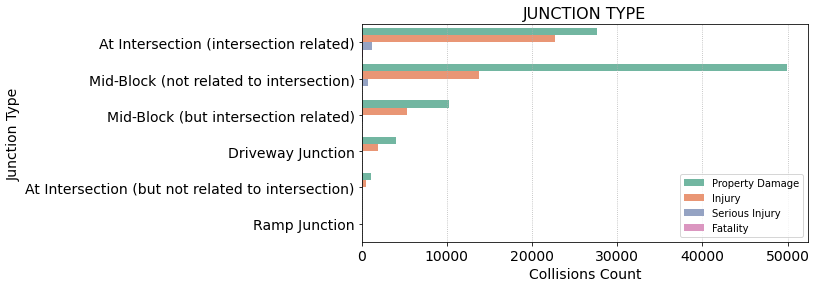

In [19]:
data["JUNCTION_TYPE"].replace('Unknown', np.nan, inplace=True)
data.dropna(axis=0, how='any',thresh=None, subset=['JUNCTION_TYPE'], inplace=True) 

plt.figure(figsize=(8,4))                                 
ax = sns.countplot(y = "JUNCTION_TYPE", hue = "SEVERITY_CODE", data=data, palette = "Set2")  
plt.title('JUNCTION TYPE', size = 16)                  
ax.set_xlabel(xlabel = "Collisions Count", size = 14)
ax.set_ylabel(ylabel = "Junction Type", size = 14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "lower right")
plt.grid(axis='x',  linestyle=':')
plt.show()

### WEATHER

In [20]:
data["WEATHER"].value_counts().to_frame().T

,Clear,Raining,Overcast,Unknown,Snowing,Other,Fog/Smog/Smoke,Sleet/Hail/Freezing Rain,Blowing Sand/Dirt,Severe Crosswind,Partly Cloudy,Blowing Snow
WEATHER,84450,23998,20468,8888,583,561,390,67,42,15,7,1


`Nan` (193 entries), `Unknown` (8888 entries) and `Other` (561 entries) values are dropped.

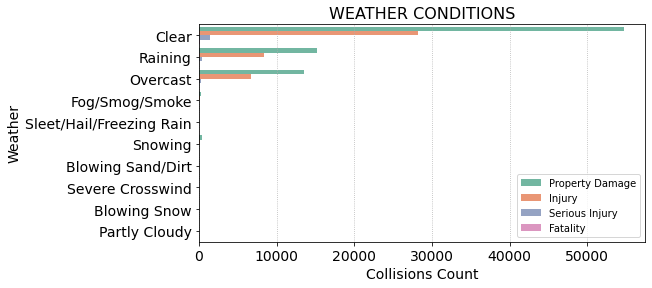

In [21]:
data["WEATHER"].replace('Unknown', np.nan, inplace=True)                      # Replace Unknown
data["WEATHER"].replace('Other', np.nan, inplace=True)                        # Replace Other
data.dropna(axis=0, how='any',thresh=None, subset=['WEATHER'], inplace=True)  # Drop Nan

plt.figure(figsize=(8,4))                                 
ax = sns.countplot(y = "WEATHER", hue = "SEVERITY_CODE", data=data, palette = "Set2")   
plt.title('WEATHER CONDITIONS', size = 16)                  
ax.set_xlabel(xlabel = "Collisions Count", size = 14)
ax.set_ylabel(ylabel = "Weather", size = 14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.grid(axis='x',  linestyle=':')
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "lower right")
plt.show()

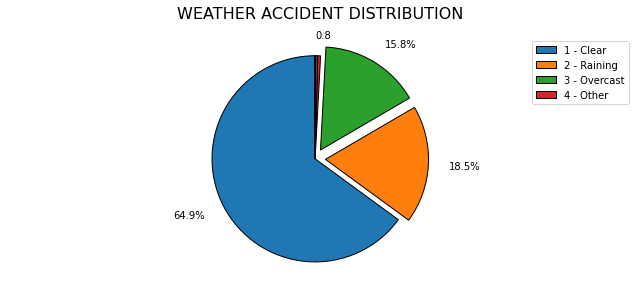

In [22]:
explode = (0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                  # Slice explode magnitude 
pie= data["WEATHER"].value_counts()                                           # Data 

pie.plot(kind="pie", figsize=(9,4),                                           # Type pie, figsize 
        labels = ["64.9%", "18.5%", "15.8%", "", "", "", "", "", "", 0.8],    # Set labels
        labeldistance = 1.20, explode=explode, startangle=90,                 # Distance, explode, angle
        shadow=False, wedgeprops = {'linewidth': 1,'edgecolor' : 'black'})    # Shadow, wedgeprops
        
plt.title("WEATHER ACCIDENT DISTRIBUTION", y=1.05, size=16)                   # Title
plt.axis("equal")                                                             # Axis position

plt.legend(['1 - Clear','2 - Raining','3 - Overcast','4 - Other'],            # Legend
           loc = "upper right")
plt.ylabel(ylabel = None)
plt.tight_layout()

The majority of the accidents take place with **clear weather conditions** (64.9%). **Raining** and **overcast conditions** together represent 34.3% of the total.

### ROAD_CONDITION

In [23]:
data["ROAD_CONDITION"].value_counts().to_frame().T

,Dry,Wet,Ice,Unknown,Snow/Slush,Other,Standing Water,Sand/Mud/Dirt,Oil
ROAD_CONDITION,93987,34047,655,597,571,55,39,21,18


`Nan` (124 entries), `Unknown` (597) and `Other`(55) values are dropped.

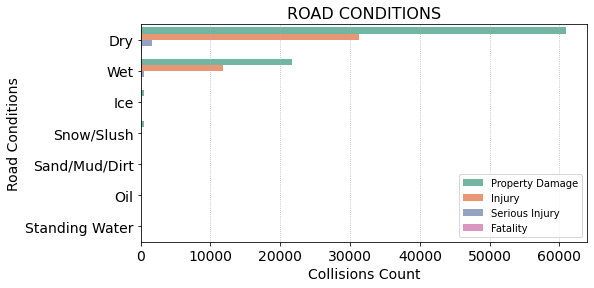

In [24]:
data["ROAD_CONDITION"].replace('Unknown', np.nan, inplace=True)
data["ROAD_CONDITION"].replace('Other', np.nan, inplace=True)
data.dropna(axis=0, how='any',thresh=None, subset=['ROAD_CONDITION'], inplace=True)  

plt.figure(figsize=(8,4))                                
ax = sns.countplot(y = "ROAD_CONDITION", hue ="SEVERITY_CODE", data=data, palette = "Set2")
ax.set_title('ROAD CONDITIONS', size = 16)   
ax.set_xlabel(xlabel = "Collisions Count", size = 14)
ax.set_ylabel(ylabel = "Road Conditions", size = 14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "lower right")
plt.grid(axis='x',  linestyle=':')
plt.show()

The majority of the accidents takes place when the road condition is **dry**, followed by **wet** conditions.

### LIGHT_CONDITION

In [25]:
data["LIGHT_CONDITION"].value_counts().to_frame().T

,Daylight,Dark - Street Lights On,Dusk,Dawn,Unknown,Dark - No Street Lights,Dark - Street Lights Off,Other,Dark - Unknown Lighting
LIGHT_CONDITION,88494,31301,4319,1765,1575,887,728,120,11


`Nan` (282 entries), `Unknown` (1575) and `Other` (120) values are dropped.

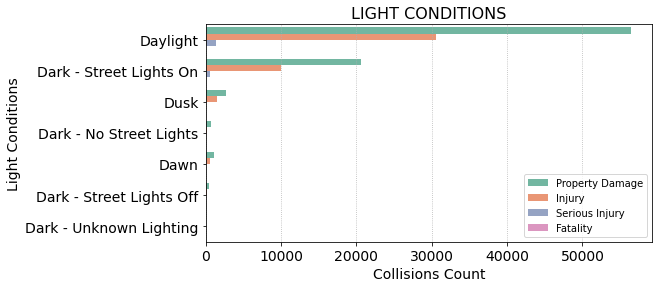

In [26]:
data["LIGHT_CONDITION"].replace('Unknown', np.nan, inplace=True)
data["LIGHT_CONDITION"].replace('Other', np.nan, inplace=True)
data.dropna(axis=0, how='any',thresh=None, subset=['LIGHT_CONDITION'], inplace=True)

plt.figure(figsize=(8,4))                                
ax = sns.countplot(y = "LIGHT_CONDITION", hue = "SEVERITY_CODE", data=data, palette = "Set2")    
ax.set_title('LIGHT CONDITIONS', size =16)  
ax.set_xlabel(xlabel = "Collisions Count", size = 14)
ax.set_ylabel(ylabel = "Light Conditions", size = 14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "lower right")
plt.grid(axis='x',  linestyle=':')
plt.show()

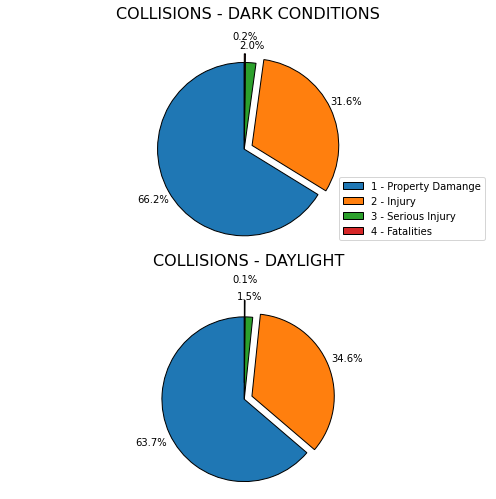

In [27]:
plt.subplot(211) 

explode = (0.0, 0.1, 0.0, 0.1)                                          # Slice explode magnitude 
data[data["LIGHT_CONDITION"].str.contains("Dark")].groupby("SEVERITY_CODE")["OBJECTID"].count().sort_values(ascending=False).plot.pie(
    figsize=(7,7), explode=explode, autopct="%1.1f%%",
    startangle=90, shadow=False, labels=None, pctdistance=1.20,
    wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'})
plt.title("COLLISIONS - DARK CONDITIONS", y = 1.10, size =16)
plt.legend(['1 - Property Damange','2 - Injury','3 - Serious Injury','4 - Fatalities'],loc = "lower right")
plt.axis("equal") 
plt.ylabel(ylabel = None)

plt.subplot(212) 
explode = (0.0, 0.1, 0.0, 0.2)                 
data[data["LIGHT_CONDITION"].str.contains("Daylight")].groupby("SEVERITY_CODE")["OBJECTID"].count().sort_values(ascending=False).plot.pie(
    figsize=(7,7), explode=explode, autopct="%1.1f%%",
    startangle=90, shadow=False, labels=None, pctdistance=1.25, 
    wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'})   
plt.title("COLLISIONS - DAYLIGHT", y = 1.10, size =16)
plt.axis("equal") 
plt.ylabel(ylabel = None)
plt.tight_layout()

**Daylight** accidents are the most frequent. The absence of light does not affect severity distribution. 

### INATTENTION

In [28]:
data["INATTENTION"].unique()

array([nan, 'Y'], dtype=object)

`Nan` values refer to `No` valuee. They are replaced with 0 values and `Y` with 1 values.  

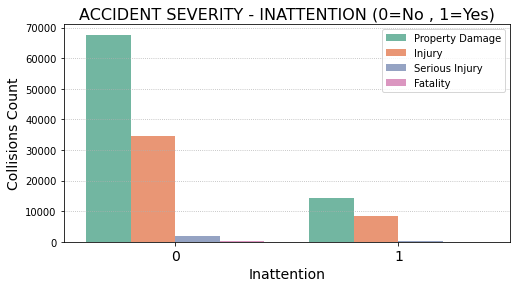

In [29]:
data["INATTENTION"].replace(np.nan, 0, inplace=True)
data["INATTENTION"].replace('Y', 1, inplace=True)

plt.figure(figsize=(8,4))                                 
ax = sns.countplot(x = "INATTENTION", hue = "SEVERITY_CODE", data=data, palette = "Set2")    
ax.set_title('ACCIDENT SEVERITY - INATTENTION (0=No , 1=Yes)', size = 16)                   
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
ax.set_xlabel(xlabel = "Inattention", size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y',  linestyle=':')
plt.show()

This information **deserves further investigation**. Which was the method used to collect it? I expect drivers to be reluctant to admit their inattention. For example, if they were not paying attention because they were using their mobiles while driving, the insurance company would not cover their costs.

### SUBSTANCES

In [30]:
data["SUBSTANCES"].value_counts().to_frame('COUNT')

,COUNT
N,79911
0,42257
Y,3482
1,1855


`Nan` values are dropped. `N` entries are equivalent to 0 and `Y` entries to 1. `N` and 0 entries are converted to 0 (numerical) and 1 and `Y` to 1.

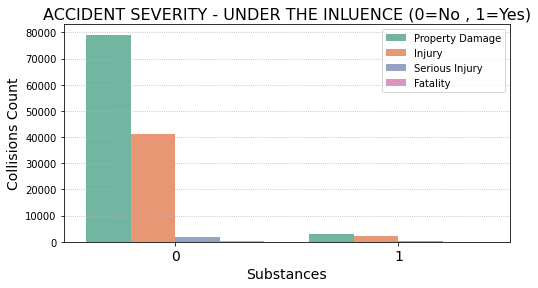

In [31]:
data["SUBSTANCES"].replace('N', 0, inplace=True)
data["SUBSTANCES"].replace('Y', 1, inplace=True)
data.dropna(axis=0, how='any',thresh=None, subset=['SUBSTANCES'], inplace=True)
data["SUBSTANCES"].replace('1', 1, inplace=True)
data["SUBSTANCES"].replace('0', 0, inplace=True)

plt.figure(figsize=(8,4))                                 
ax = sns.countplot(x = "SUBSTANCES", hue = "SEVERITY_CODE", data=data, palette = "Set2") 
ax.set_title('ACCIDENT SEVERITY - UNDER THE INLUENCE (0=No , 1=Yes)', size = 16)  
ax.set_ylabel(ylabel = "Collisions Count", size = 14)
ax.set_xlabel(xlabel = "Substances", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y',  linestyle=':')
plt.show()

The distribution of values 0 and 1 are very different:

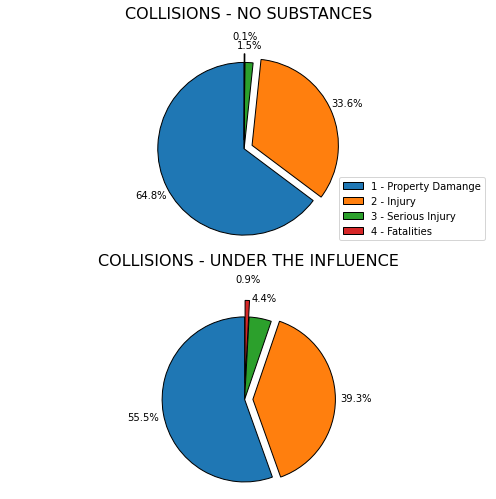

In [32]:
plt.subplot(211) 

explode = (0.0, 0.1, 0.0, 0.1)                                          # Slice explode magnitude 
data[data["SUBSTANCES"]==0].groupby("SEVERITY_CODE")["OBJECTID"].count().sort_values(ascending=False).plot.pie(
    figsize=(7,7), explode=explode, autopct="%1.1f%%",
    startangle=90, shadow=False, labels=None, pctdistance=1.20,
    wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'})
plt.title("COLLISIONS - NO SUBSTANCES", y = 1.10, size =16)
plt.legend(['1 - Property Damange','2 - Injury','3 - Serious Injury','4 - Fatalities'],loc = "lower right")
plt.axis("equal") 
plt.ylabel(ylabel = None)

plt.subplot(212) 
explode = (0.0, 0.1, 0.0, 0.2)                 
data[data["SUBSTANCES"]==1].groupby("SEVERITY_CODE")["OBJECTID"].count().sort_values(ascending=False).plot.pie(
    figsize=(7,7), explode=explode, autopct="%1.1f%%",
    startangle=90, shadow=False, labels=None, pctdistance=1.25, 
    wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'})   
plt.title("COLLISIONS - UNDER THE INFLUENCE", y = 1.10, size =16)
plt.axis("equal") 
plt.ylabel(ylabel = None)
plt.tight_layout()

When driving under the influence:
- **Fatalities** increases from 0.1% to 0.9%.
- **Serious injuries** increase from 1.5% to 4.3%.
- **Injuiries** increase from 33.1% to 39.2%.

It is interesting to analyse how substances consumption variates during the day.

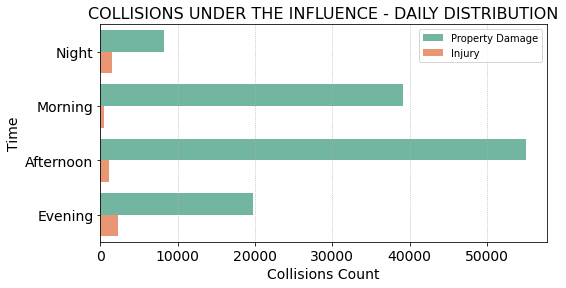

In [33]:
plt.figure(figsize=(8,4))                                
ax = sns.countplot(y = data["TIME"], hue=data['SUBSTANCES'], data=data, palette = "Set2")
ax.set_title('COLLISIONS UNDER THE INFLUENCE - DAILY DISTRIBUTION', size = 16)  
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel(ylabel = "Time", size = 14)
ax.set_xlabel(xlabel = "Collisions Count", size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='x',  linestyle=':')
plt.show()

Substances consumption increases during the day and peaks in the **evening**.

### PEDESTRAIN_GRANTED

In [34]:
data["PEDESTRAIN_GRANTED"].unique()

array(['Y', nan], dtype=object)

`Nan` entries are equivalent to 0 and `Y` entries to 1. 

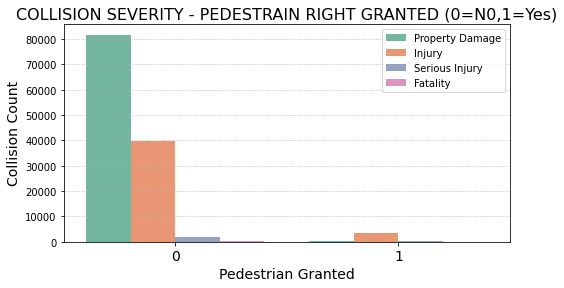

In [35]:
data["PEDESTRAIN_GRANTED"].replace(np.nan, 0, inplace=True)
data["PEDESTRAIN_GRANTED"].replace('Y', 1, inplace=True)

plt.figure(figsize=(8,4))                                 
ax = sns.countplot(x = "PEDESTRAIN_GRANTED", hue ="SEVERITY_CODE", data=data, palette = "Set2")
ax.set_title('COLLISION SEVERITY - PEDESTRAIN RIGHT GRANTED (0=N0,1=Yes)', size = 16)                 
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_ylabel(ylabel = "Collision Count", size = 14)
ax.set_xlabel(xlabel = "Pedestrian Granted", size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y',  linestyle=':')
plt.show()

### SPEEDING

In [36]:
data["SPEEDING"].unique()

array([nan, 'Y'], dtype=object)

`Nan` entries are equivalent to 0 and `Y` entries to 1. 

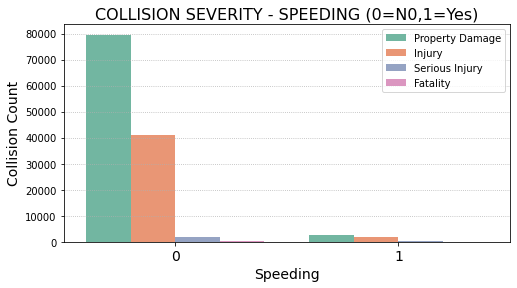

In [37]:
data["SPEEDING"].replace(np.nan, 0, inplace=True)
data["SPEEDING"].replace('Y', 1, inplace=True)

plt.figure(figsize=(8,4))                                
ax = sns.countplot(x = "SPEEDING", hue = "SEVERITY_CODE", data=data, palette ="Set2")
ax.set_title('COLLISION SEVERITY - SPEEDING (0=N0,1=Yes)', size = 16)                   # Title
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_ylabel(ylabel = "Collision Count", size = 14)
ax.set_xlabel(xlabel = "Speeding", size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y',  linestyle=':')
plt.show()

The distribution of collions when drivers speed or not are very different.

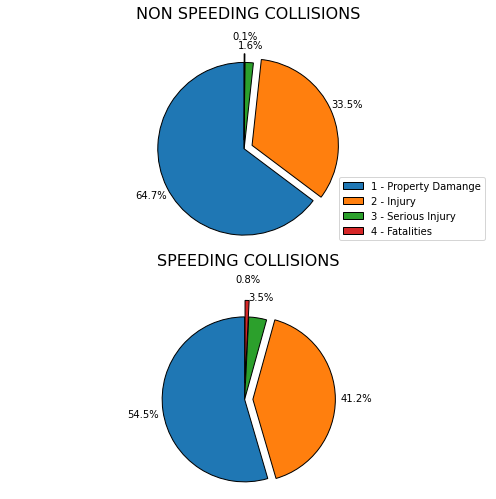

In [38]:
plt.subplot(211) 

explode = (0.0, 0.1, 0.0, 0.1)                                          # Slice explode magnitude 
data[data["SPEEDING"]==0].groupby("SEVERITY_CODE")["OBJECTID"].count().sort_values(ascending=False).plot.pie(
    figsize=(7,7), explode=explode, autopct="%1.1f%%",
    startangle=90, shadow=False, labels=None, pctdistance=1.20,
    wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'})
plt.title("NON SPEEDING COLLISIONS", y = 1.10, size =16)
plt.legend(['1 - Property Damange','2 - Injury','3 - Serious Injury','4 - Fatalities'],loc = "lower right")
plt.axis("equal") 
plt.ylabel(ylabel = None)

plt.subplot(212) 
explode = (0.0, 0.1, 0.0, 0.2)                 
data[data["SPEEDING"]==1].groupby("SEVERITY_CODE")["OBJECTID"].count().sort_values(ascending=False).plot.pie(
    figsize=(7,7), explode=explode, autopct="%1.1f%%",
    startangle=90, shadow=False, labels=None, pctdistance=1.25, 
    wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'})   
plt.title("SPEEDING COLLISIONS", y = 1.10, size =16)
plt.axis("equal") 
plt.ylabel(ylabel = None)
plt.tight_layout()

Speeding increases:
- **Fatalities** from 0.1% to 0.7%.
- **Serious injuries** from 1.6% to 3.5%.
- **Injuries** from 33.1% to 40.3%.

### HIT_PARKED_CAR

In [39]:
data["HIT_PARKED_CAR"].value_counts().to_frame('COUNT')

,COUNT
N,123083
Y,4422


No Null values.

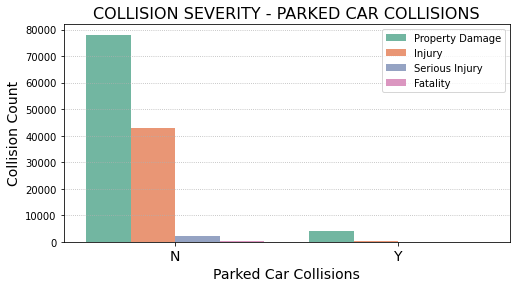

In [40]:
plt.figure(figsize=(8,4))                                 
ax = sns.countplot(x = "HIT_PARKED_CAR", hue ="SEVERITY_CODE", data=data, palette = "Set2")  
ax.set_title('COLLISION SEVERITY - PARKED CAR COLLISIONS', size = 16)                   
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
ax.set_ylabel(ylabel = "Collision Count", size = 14)
ax.set_xlabel(xlabel = "Parked Car Collisions", size = 14)
ax.legend(['Property Damage','Injury','Serious Injury','Fatality'], loc = "upper right")
plt.grid(axis='y',  linestyle=':')
plt.show()

Very low rate of serious injuries or fatalities when a parked car is hit.

### PERSON_COUNT, PEDESTRAIN_COUNT, BYCICLE_COUNT, VEHICLE_COUNT

These attributes will be dropped after having performed a statistical correlation analysis amongst features as they are probably not significant to create a predictive model. Their exploration showed that the majority of the accidents involve:
- Less than five people (the highest rate involves two people).
- Only drivers, followed by one pedestrian and one cyclist. 

### 3.4. Creating an Interactive Map 
The column `X` contains the latitude of the recorded accident, and the column `Y` its longitude. This geospatial data will be used to create an interactive Folium map of the final data that will be used for the predictive models. This map allows to explore the street of the city of Seattle and visualise the distribution of the collisions.

In [1]:
#data.dropna(axis=0, how='any',thresh=None, subset=['X', 'Y'], inplace=True)  # Drop Nan
# Create a copy of data with the latitude, longitude and collision description for the markers
#df = data[["X","Y","CRASH_TYPE"]].copy()

# let's start again with a clean copy of the map of San Francisco
#seattle_map = folium.Map(location=[47.606209, -122.332069], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
#car_accidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
#for lat, lng, label, in zip(df["Y"], df["X"], df["CRASH_TYPE"]):
#    folium.Marker(
#        location=[lat, lng],
#        icon=None,
#       popup=label,
#    ).add_to(car_accidents)

# display map
#seattle_map

# To reduce the Notebook size, a picture of the Folium map is reported. The Interactive map can be explored
# if the Notebook file is downloaded

#Image(filename="/Users/riccardobellio/Desktop/mappa.png")

The majority of the accidents occur in the city center (the features `X` and `Y` as well as `OBJECTID` can be dropped now).

In [42]:
data.drop(['X', 'Y'], axis=1, inplace=True)
data.drop(['OBJECTID'], axis=1, inplace=True)

### 3.5 Statistical Correlation

Statistical correlation amongst the selected features can be studied to further reduce the number of features and find outliers.

In [43]:
data.corr()

,SEVERITY_CODE,PERSON_COUNT,PEDESTRAIN_COUNT,BYCICLE_COUNT,VEHICLE_COUNT,INATTENTION,SUBSTANCES,PEDESTRAIN_GRANTED,SPEEDING
SEVERITY_CODE,1.000000,0.097248,0.299488,0.228633,-0.153953,0.013261,0.051721,0.225607,0.047938
PERSON_COUNT,0.097248,1.000000,-0.048590,-0.067523,0.327691,0.063446,0.057508,-0.050885,0.059459
PEDESTRAIN_COUNT,0.299488,-0.048590,1.000000,-0.029882,-0.414775,-0.018283,0.037781,0.483443,-0.028399
BYCICLE_COUNT,0.228633,-0.067523,-0.029882,1.000000,-0.395640,-0.007111,-0.014629,0.307590,-0.014499
VEHICLE_COUNT,-0.153953,0.327691,-0.414775,-0.395640,1.000000,0.044703,0.066152,-0.353883,0.087977
INATTENTION,0.013261,0.063446,-0.018283,-0.007111,0.044703,1.000000,-0.030195,-0.040243,-0.040884
SUBSTANCES,0.051721,0.057508,0.037781,-0.014629,0.066152,-0.030195,1.000000,-0.012549,0.058843
PEDESTRAIN_GRANTED,0.225607,-0.050885,0.483443,0.307590,-0.353883,-0.040243,-0.012549,1.000000,-0.025945
SPEEDING,0.047938,0.059459,-0.028399,-0.014499,0.087977,-0.040884,0.058843,-0.025945,1.000000


A Correlation Heat-map will visualise this data more efficiently.

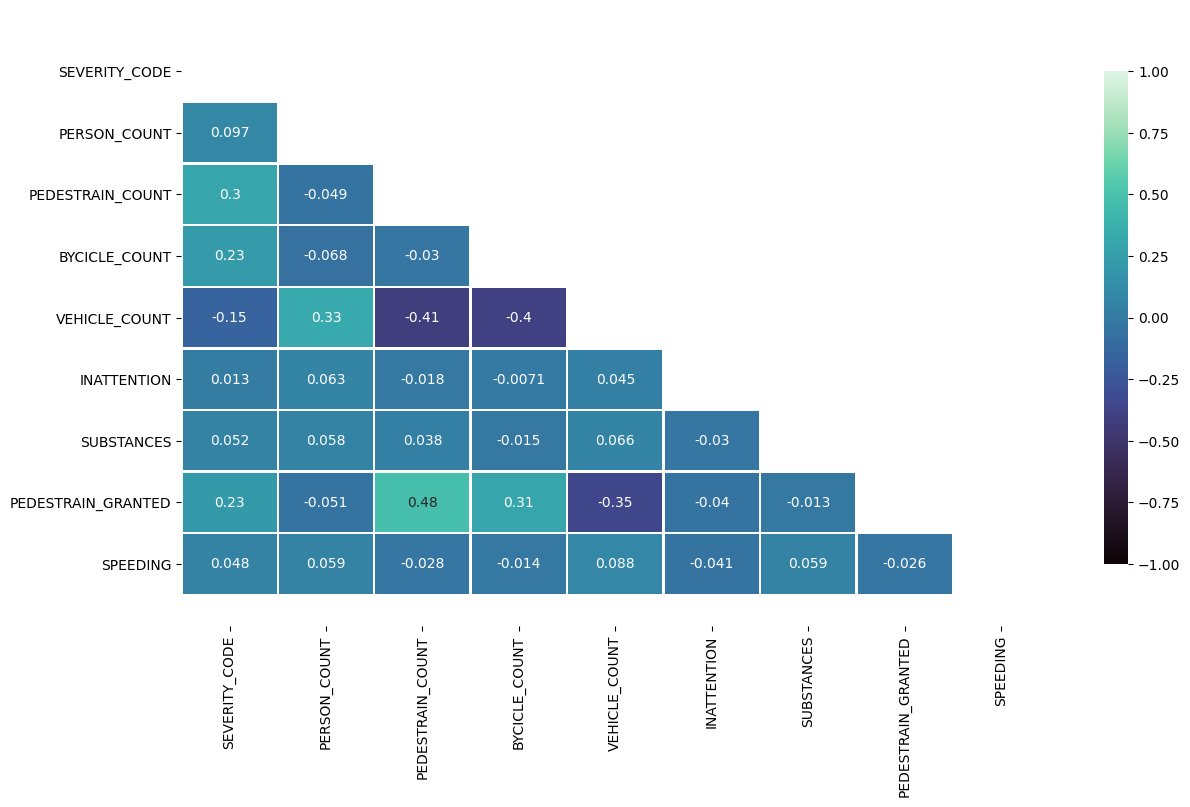

In [44]:
corr = data.corr()                            # Data

# A mask to only visualise the lower triangle of the plot
mask = np.zeros_like(corr, dtype=np.bool)     # All False values)
mask[np.triu_indices_from(mask)] = True       # Upper Triangle False values

mpl.style.use('default')                      # Default style
f, ax = plt.subplots(figsize=(14,8))          # Matplotlib figure set up

sns.heatmap(                                  # Seaborn, correlation heatmap with mask
    corr,                                     # Data
    mask=mask,                                # Mask
    cmap="mako",                            # Colors choice
    annot=True,                               # Include values
    vmax=1,                                   # Legend, maximum value
    vmin=-1,                                  # Legend, minimum value
    center=0,                                 # Legend, center value
    linewidths=1,                             # Line Width to divide cells
    cbar_kws={"shrink": .8}                   # Legend, shrink percentage
)

bottom, top = ax.get_ylim()                   # Recent version of Python messes up with seaborn
ax.set_ylim(bottom + 0.5, top - 0.5)          # Need to set the top/bottom of the heatmap to correctly visualie it  
plt.show()

The squares containing:

- A positive value show a positive relationships between features: if one feature increases, the other will do the same. The higher the value, the stronger the relationships and the darker the red colour.
- A negative value show an inverse relationship between features: if one feature increases, the other decreases. The lower the value, the stronger the negative relationship and the lighter the yellow colour.
- A value close to zero show almost no co-dependency between features.

The heat-map does not shows any significant correlations between features. Only `Pedestrian_Count` and `Pedestrian_Granted` are positively correlated, but their correlation is not strong enough to be considered significant.

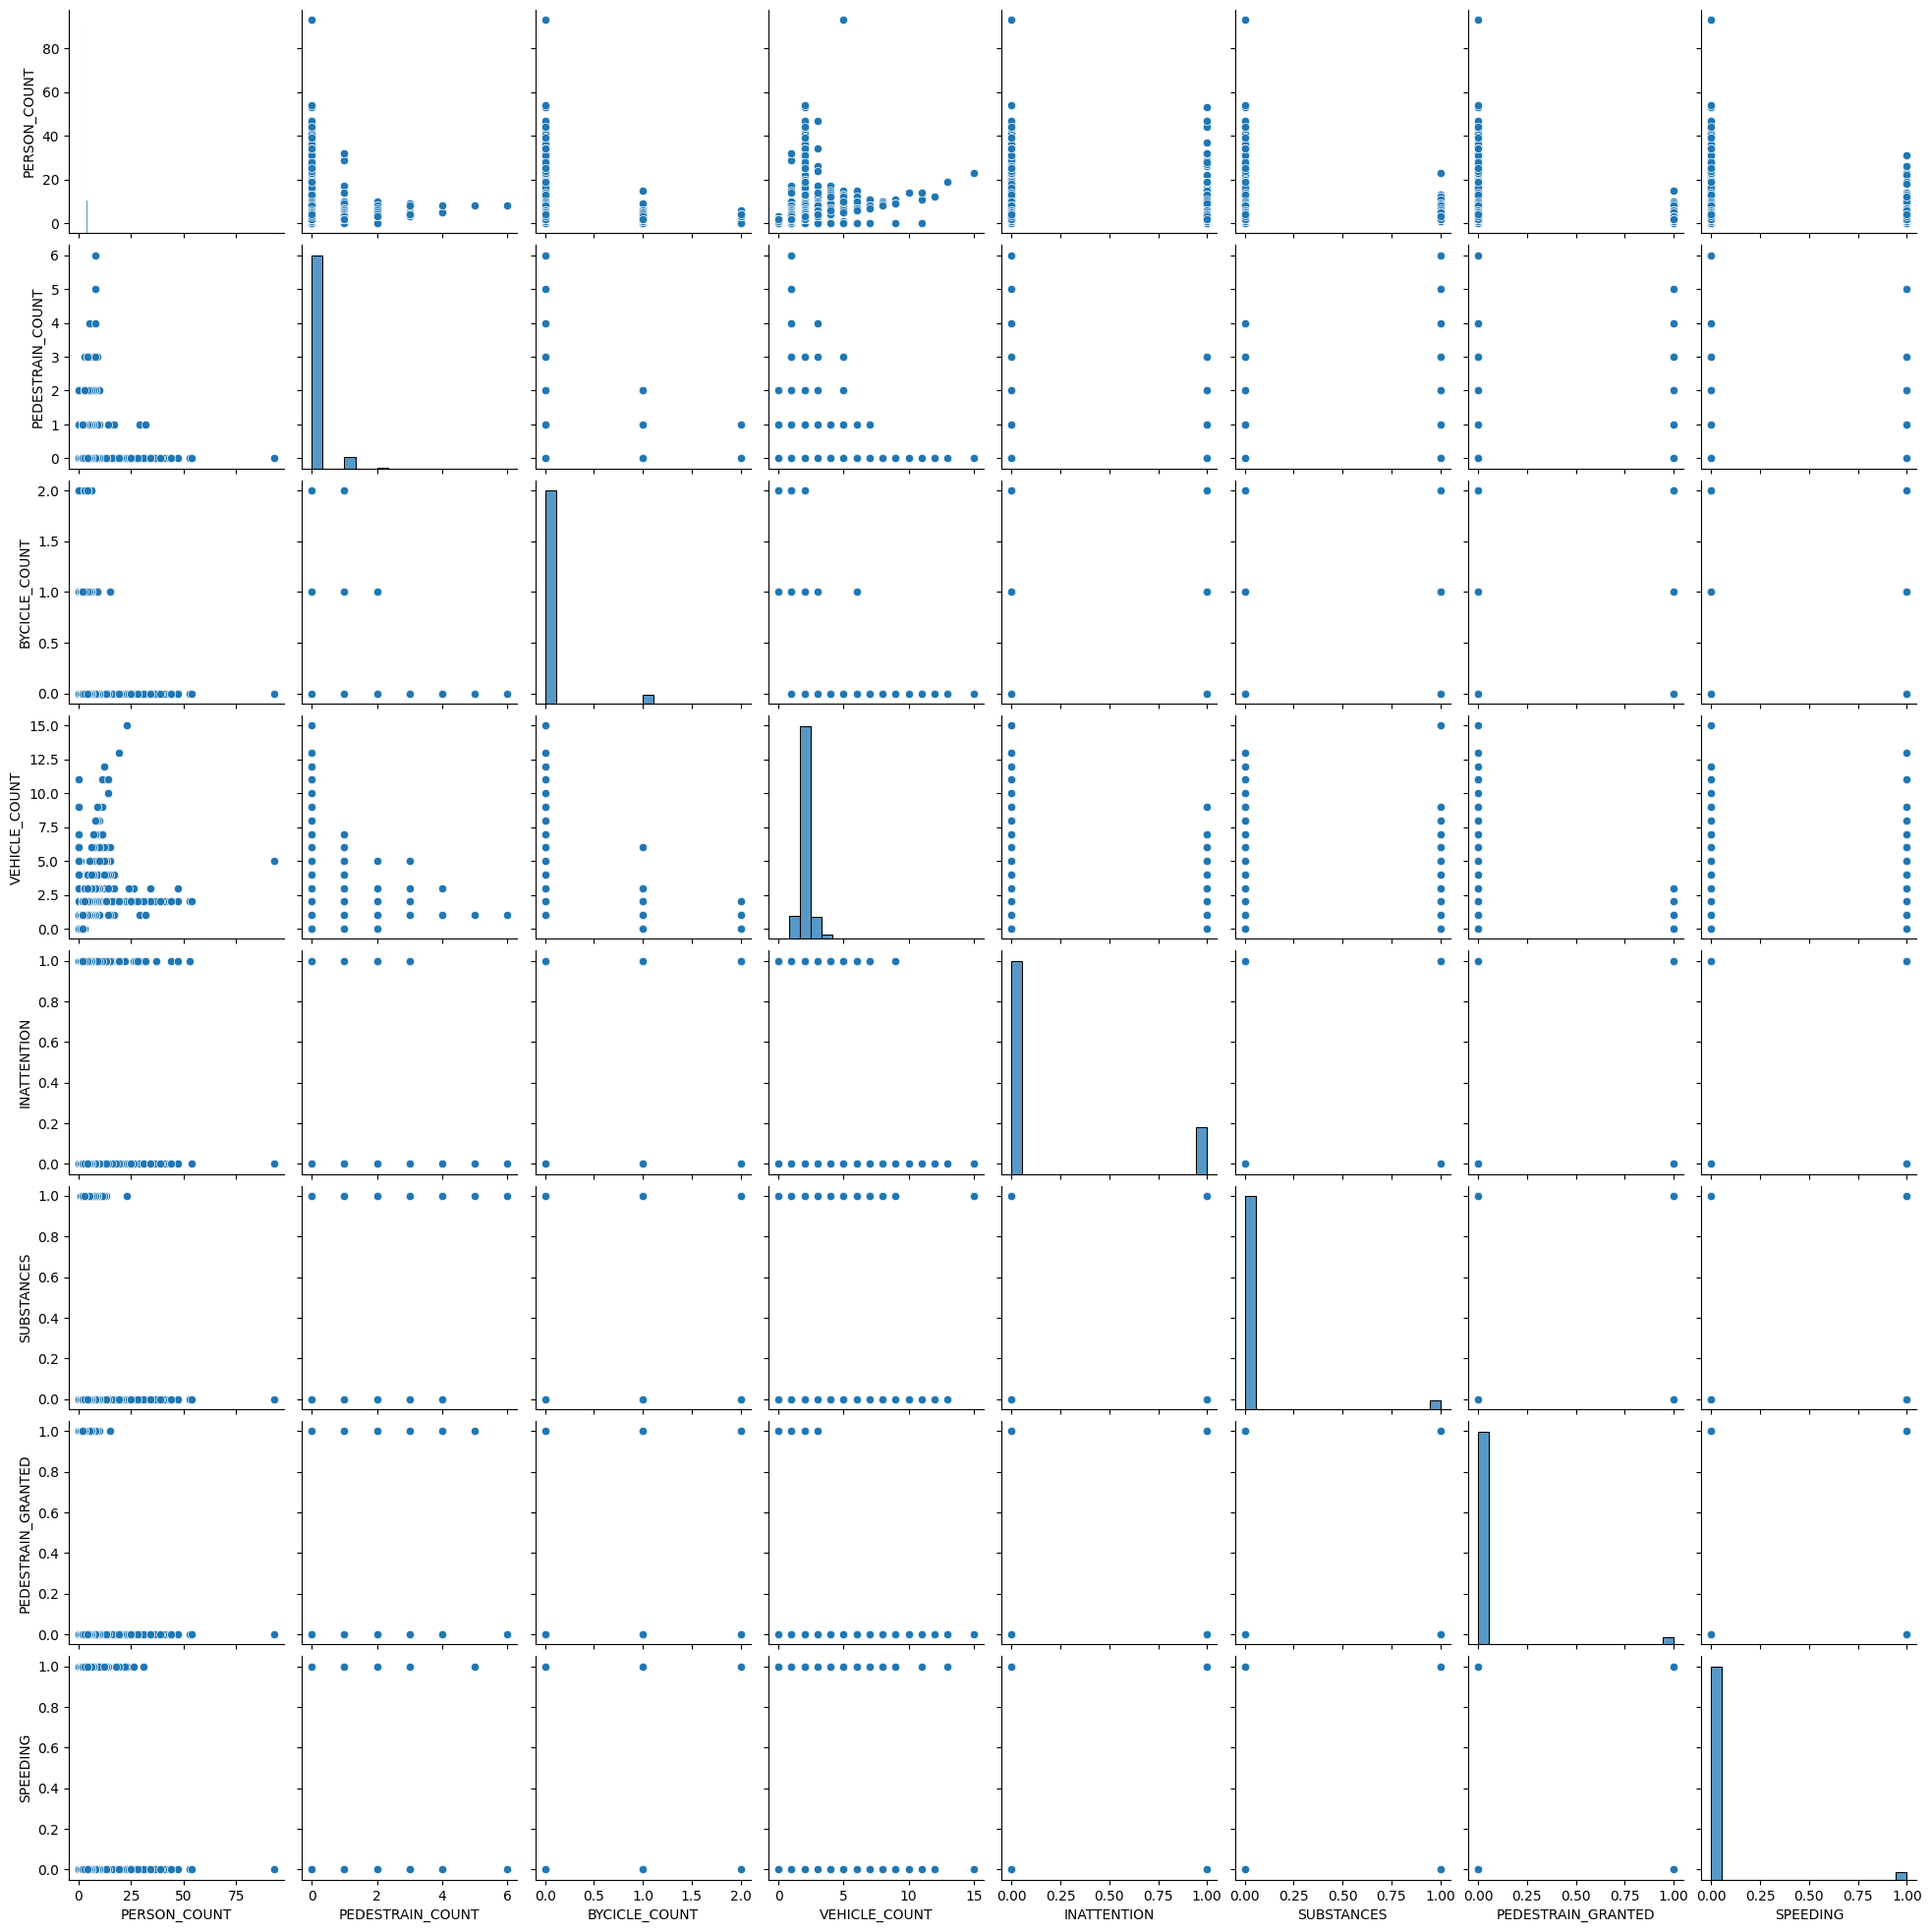

In [45]:
pair = data.drop("SEVERITY_CODE", axis=1)
sns.pairplot(pair)

The outliers visible in these scatterplots cannot be removed. As stated initially, the dataset is imbalanced and these values are equivalent to the extremeties of `SEVERITY_CODE` label. `PERSON_COUNT`,`PEDESTRAIN_COUNT`,`BYCICLE_COUNT`,`VEHICLE_COUNT` and `HIT_PARKED_CAR` can be dropped now.

In [46]:
data.drop(['PERSON_COUNT','PEDESTRAIN_COUNT','BYCICLE_COUNT','VEHICLE_COUNT', 'HIT_PARKED_CAR'], 
          axis=1, inplace=True)  # Drop Nan

### 3.6 Convert Categorical Data into Int64 Data 

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127505 entries, 0 to 221265
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CRASH_LOC_TYPE      127505 non-null  object  
 1   SEVERITY_CODE       127505 non-null  int64   
 2   CRASH_TYPE          127505 non-null  object  
 3   JUNCTION_TYPE       127505 non-null  object  
 4   INATTENTION         127505 non-null  int64   
 5   SUBSTANCES          127505 non-null  int64   
 6   WEATHER             127505 non-null  object  
 7   ROAD_CONDITION      127505 non-null  object  
 8   LIGHT_CONDITION     127505 non-null  object  
 9   PEDESTRAIN_GRANTED  127505 non-null  int64   
 10  SPEEDING            127505 non-null  int64   
 11  TIME                127505 non-null  category
 12  WEEK_DAY            127505 non-null  object  
 13  MONTH               127505 non-null  object  
dtypes: category(1), int64(5), object(8)
memory usage: 18.7+ MB


To be ready for modeling, object and categorical data types need to be converted into int64 data types. 
The method `pd.get_dummies` for one hot encoding is used so that the column names of category will be preserved. 

In [48]:
features_to_encode = ['CRASH_LOC_TYPE','CRASH_TYPE','JUNCTION_TYPE','WEATHER','ROAD_CONDITION','LIGHT_CONDITION',
                      'TIME','WEEK_DAY','MONTH']

data_encoded = pd.get_dummies(data, columns=features_to_encode, dtype='int64')

In [49]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127505 entries, 0 to 221265
Data columns (total 69 columns):
 #   Column                                                           Non-Null Count   Dtype
---  ------                                                           --------------   -----
 0   SEVERITY_CODE                                                    127505 non-null  int64
 1   INATTENTION                                                      127505 non-null  int64
 2   SUBSTANCES                                                       127505 non-null  int64
 3   PEDESTRAIN_GRANTED                                               127505 non-null  int64
 4   SPEEDING                                                         127505 non-null  int64
 5   CRASH_LOC_TYPE_Alley                                             127505 non-null  int64
 6   CRASH_LOC_TYPE_Block                                             127505 non-null  int64
 7   CRASH_LOC_TYPE_Intersection                    

# 4. Modeling
The following pie chart shows the data distribution of our final labeled data.

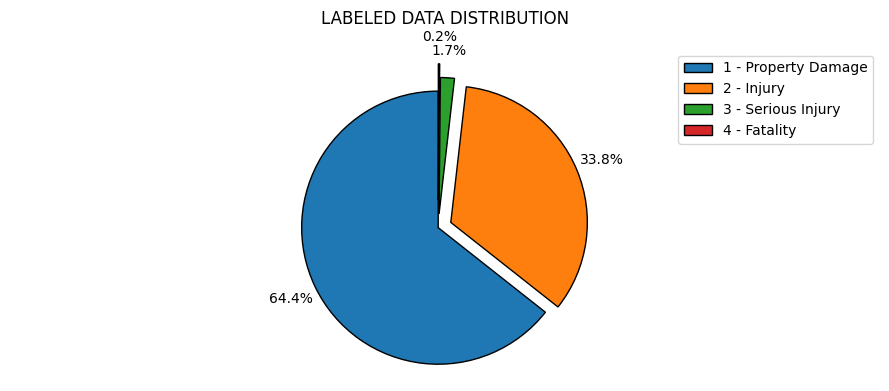

In [50]:
explode = (0.0, 0.1, 0.1, 0.2)                             # Slice explode magnitude 
pie= data["SEVERITY_CODE"].value_counts()                  # Data 
pie.plot(kind="pie", figsize=(9,4),                        # Type pie, figsize 
        explode=explode, autopct="%1.1f%%",                # Explode, percentage length
        startangle=90, shadow=False,                       # Orientation, shadow 
        labels=None, pctdistance=1.20,                     # No labels, percentage distance
        wedgeprops = {'linewidth': 1,                      # Wedgeprops
                      'edgecolor' : 'black'})
plt.title("LABELED DATA DISTRIBUTION", y=1.05, size=12)    # Title
plt.axis("equal")                                          # Axis position
plt.ylabel(ylabel = None)                                  # Reset Y label 
plt.legend(['1 - Property Damage','2 - Injury',            # Legend
            '3 - Serious Injury','4 - Fatality'], 
           loc = "upper right")
plt.tight_layout()         

In [51]:
data_encoded["SEVERITY_CODE"].value_counts().to_frame("SEVERITY COUNT")

,SEVERITY COUNT
1,82075
2,43122
3,2105
4,203


### Problem:
The cleaned dataset has a total of **127505 entries** and the four classes of our labeled data are not represented equally. This big difference was expected because the the vast majority of vehicle accidents involve property damage only with fewer fatalities. This is a **multiple-class classification problem** with an **imbalanced dataset**: if the predicitve model was trained with this type of imbalanced data, since data is heavily biased towards **Class 1 (property damage)**, the model would over-fit on this class label and predicts it in most of the cases and **not effectively predict the minority classes**.

If the accuracy of such a  model was tested, the result would be a great score. However, this would be a misleading result: the model **may never classify Class 3 (serious injuries )** or **class 4 (fatalities)**. With imbalanced classes, it is easy to get a high accuracy without actually making useful predictions. Accuracy as an evaluation metric makes sense only if the class labels are uniformly distributed. 

### Solutions: 
In order to balance our dataset:
1. The majority class/classes (the over-represented classes) will be **under-sampled** (or removed).
2. The minority class/classes (the under-represented classes) will be **over-sampled** (or added). Over-sampling does not introduce new information in the dataset, it only shifts it around so as to increase the "numerical stability" of the resulting models.

A slight imbalance will be maintained to reflect the original dataset distribution:

  |        CLASS          | ACTION   
  |:----------------------|:----------
  |**1 - Property Damage**| Randomly under-sampled to 35000
  |**2 - Injury**         | Randomly under-sampled to 30000
  |**3 - Serious Injury** | Over-sampled to 25000
  |**4 - Fatality**       | Over-sampled to 25000  
 
In addition, when machine learning algorithms are applied to multiple-class classification problems with balanced datasets, they do not perform well. There are different possible strategies to improve their performance and the solution adopted in this project is to **binarise the labeled data**. The four classes in the labeled output will be turned into two classes: property damage, injury and serious injury will be merged into a new class **non-fatality**:

  |        OLD CLASS      | NEW CLASS   
  |:----------------------|:----------
  |1 - Property Damage    | **1 - Non_Fatality**
  |2 - Injury             | **1 - Non_Fatality**
  |3 - Serious Injury     | **1 - Non_Fatality** 
  |4 - Fatality           | **2 - Fatality**   

### Re-Sample data

In [52]:
BINARY = data_encoded.copy()                                      # Make a copy of the dataste
BINARY['BINARY_LABEL'] = 0                                        # Set a new Column Binary_label to 0
BINARY.loc[BINARY['SEVERITY_CODE'] == 4, 'BINARY_LABEL'] = 1      # 4 -->1
BINARY['BINARY_LABEL'].value_counts().to_frame()

,BINARY_LABEL
0,127302
1,203


In [53]:
BINARY = pd.concat([BINARY[BINARY['BINARY_LABEL']==1].sample(2500, replace = True),  # Concat 0 and 1 values
                   BINARY[BINARY['BINARY_LABEL']==0].sample(3000)], axis=0)
BINARY['BINARY_LABEL'].value_counts().to_frame()

,BINARY_LABEL
0,3000
1,2500


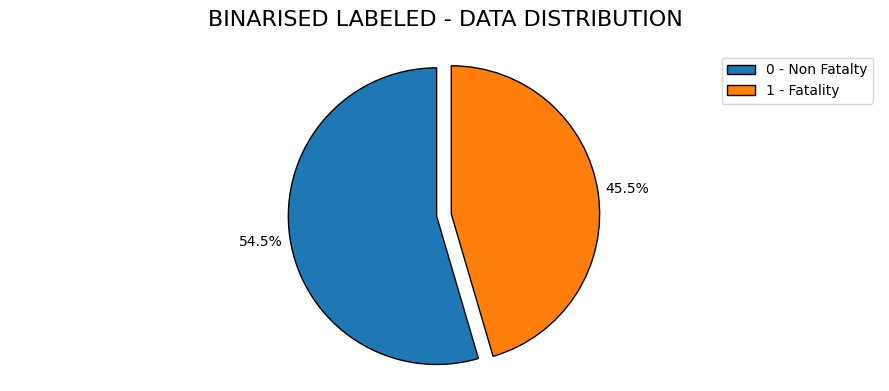

In [54]:
explode = (0.0, 0.1)             
pie= BINARY["BINARY_LABEL"].value_counts()                

pie.plot(kind="pie", figsize=(9,4), explode=explode, autopct="%1.1f%%", startangle=90, shadow=False,
         labels=None, pctdistance=1.20, wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'})  
plt.title("BINARISED LABELED - DATA DISTRIBUTION", y=1.05, size=16) 
plt.axis("equal")                                   
plt.ylabel(ylabel = None)                                 
plt.legend(['0 - Non Fatalty','1 - Fatality'], loc = "upper right")
plt.tight_layout()

A slight imbalance is kept to reflect the original distribution.

In [55]:
BINARY.drop(['SEVERITY_CODE'], axis=1, inplace=True)             # Original Severity_code is dropped

These algorithms will be tested and their performance measured:
- **K Nearest Neighbours**
- **Decision Trees**
- **Logistic Regressions**
- **Support Vector Machine** 

The same process will be used with every algorithm:
1. **Scaling** data: Machine learning models require each feature value to be close to zero or that all features vary on comparable scales. Data is put in a format that works better for algorithms. 
2. **Splitting** data into **Train & Test sets**.
3. **Optimising** algorithms **hyperparameters**.

The metrics used to evaluate model performance are:
- **Accuracy**, **Precision** and **Recall**.
- **Confusion-Matrix** (to visualise more accurately what the models predict).

In [56]:
y_binary = BINARY["BINARY_LABEL"]                                                    # Create y
X_binary = BINARY[['INATTENTION', 'SUBSTANCES', 'PEDESTRAIN_GRANTED', 'SPEEDING',    # Create X
       'CRASH_LOC_TYPE_Block', 'CRASH_LOC_TYPE_Intersection',
       'CRASH_TYPE_Angles', 'CRASH_TYPE_Cycles', 'CRASH_TYPE_Head On',
       'CRASH_TYPE_Left Turn', 'CRASH_TYPE_Parked Car',
       'CRASH_TYPE_Pedestrian', 'CRASH_TYPE_Rear Ended',
       'CRASH_TYPE_Right Turn', 'CRASH_TYPE_Sideswipe',
       'JUNCTION_TYPE_At Intersection (but not related to intersection)',
       'JUNCTION_TYPE_At Intersection (intersection related)',
       'JUNCTION_TYPE_Driveway Junction',
       'JUNCTION_TYPE_Mid-Block (but intersection related)',
       'JUNCTION_TYPE_Mid-Block (not related to intersection)',
       'JUNCTION_TYPE_Ramp Junction', 'WEATHER_Blowing Sand/Dirt',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'ROAD_CONDITION_Dry', 'ROAD_CONDITION_Ice', 'ROAD_CONDITION_Oil',
       'ROAD_CONDITION_Sand/Mud/Dirt', 'ROAD_CONDITION_Snow/Slush',
       'ROAD_CONDITION_Standing Water', 'ROAD_CONDITION_Wet',
       'LIGHT_CONDITION_Dark - No Street Lights',
       'LIGHT_CONDITION_Dark - Street Lights Off',
       'LIGHT_CONDITION_Dark - Street Lights On',
       'LIGHT_CONDITION_Dark - Unknown Lighting', 'LIGHT_CONDITION_Dawn',
       'LIGHT_CONDITION_Daylight', 'LIGHT_CONDITION_Dusk', 'TIME_Night',
       'TIME_Morning', 'TIME_Afternoon', 'TIME_Evening', 'WEEK_DAY_Fri',
       'WEEK_DAY_Mon', 'WEEK_DAY_Sat', 'WEEK_DAY_Sun', 'WEEK_DAY_Thu',
       'WEEK_DAY_Tue', 'WEEK_DAY_Wed', 'MONTH_Apr', 'MONTH_Aug', 'MONTH_Dec',
       'MONTH_Feb', 'MONTH_Jan', 'MONTH_Jul', 'MONTH_Jun', 'MONTH_Mar',
       'MONTH_May', 'MONTH_Nov', 'MONTH_Oct', 'MONTH_Sep']]

In [57]:
X_binary = preprocessing.StandardScaler().fit(X_binary).transform(X_binary)             # Scaling
# Training_set -> 67%, Test_set -> 33%
X_train, X_test, y_train, y_test = train_test_split(X_binary,y_binary, test_size=0.2, random_state=21)

In [58]:
k = 2                                                                           
neighbour = KNeighborsClassifier(n_neighbors=k)                           # Classifier Object
neighbour.fit(X_train,y_train)                                            # Fit with Train set
prediction_knn = neighbour.predict(X_test)                                # Form a prediction

### K Nearest Neighbours

In [59]:
k = 3                                                                            # Random value for k 
neighbour = KNeighborsClassifier(n_neighbors=k)                                  # Classifier Object
neighbour.fit(X_train,y_train)                                                   # Fit with Train set

prediction_N = neighbour.predict(X_test)                                         # Form a prediction
score_k = accuracy_score(y_true=y_test, y_pred=prediction_N)                     # Accuracy

Optimising the number of neighbours (values for k).

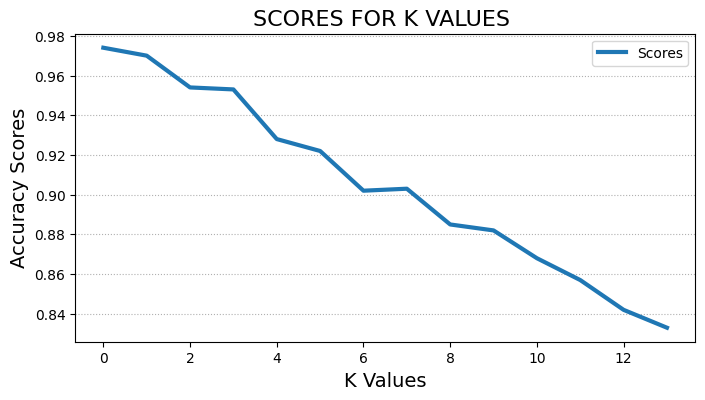

In [60]:
scores = []                                                                    # Create an empty list
for x in range(1,15):                                                          # Loop up to 15
    neighbour = KNeighborsClassifier(n_neighbors=x)                            # x increases at every loop
    neighbour.fit(X_train, y_train)                                     
    predictions =neighbour.predict(X_test)
    score = accuracy_score(y_true = y_test, y_pred = predictions)
    scores.append(round(score, 3))                                             # Append, empty list 
accuracy_scores = pd.DataFrame(data=scores, columns = ["Scores"])              # Crete a new dataframe
accuracy_scores.plot(kind="line", figsize=(8,4), linewidth = 3)                # Plot the results
plt.title('SCORES FOR K VALUES ', size=16)                                     # Title
plt.ylabel('Accuracy Scores', size=14)                                         # Ylabel
plt.xlabel('K Values', size=14)                                                # Xlabel
plt.grid(axis='y',  linestyle=':')
plt.show()

Best value for `k = 3`.

ACCURACY SCORE: 0.97

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       612
           1       0.94      0.99      0.97       488

    accuracy                           0.97      1100
   macro avg       0.97      0.97      0.97      1100
weighted avg       0.97      0.97      0.97      1100



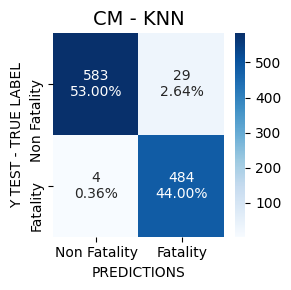

In [61]:
print('ACCURACY SCORE:',round(accuracy_score(y_test, prediction_knn), 3))
print()
print('CLASSIFICATION REPORT:\n')
print(classification_report(y_test, prediction_knn))

# Compute confusion matrix
cf_knn_matrix = confusion_matrix(y_test, prediction_knn)
group_counts = ["{0:0.0f}".format(value) for value in cf_knn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_knn_matrix.flatten()/np.sum(cf_knn_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(3,3))  
ax = sns.heatmap(cf_knn_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('CM - KNN', size = 14)                   # Title
ax.set_xticklabels(labels = ("Non Fatality","Fatality"), size = 10)
ax.set_yticklabels(labels = ("Non Fatality","Fatality"), size = 10)
plt.ylabel('Y TEST - TRUE LABEL')
plt.xlabel('PREDICTIONS')
plt.tight_layout()
plt.show()

- The model performs with an accuracy of app. 97%. With such a high score, there is a chance that the model is overfitting. 
- Precision, recall and f1-score values are close to 1 (ideal scenario).
- The confusion matrix eliminates the suspect that the model is overfitting. It confirms a good result: only `24 false negative` vs. `588 true negative` and `9 false positive` vs. `479 true positive`. 

### Decision tree:

In [62]:
tree = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0) # Create Decision Tree Object
tree.fit(X_train, y_train)                                       # Train it with our train set
prediction_t = tree.predict(X_test)   

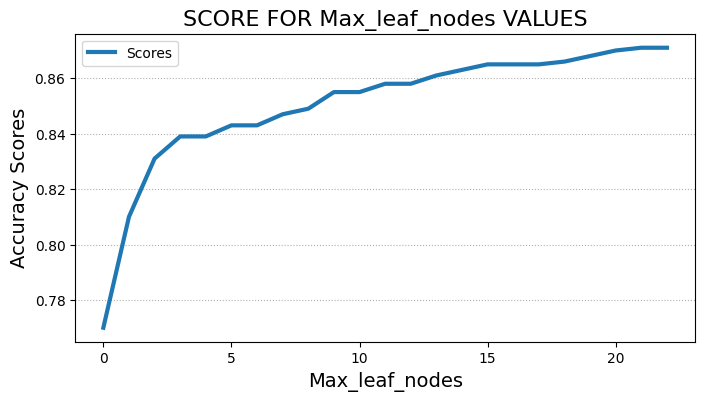

In [63]:
scores = []                                                                     # Create an empty list
for x in range(2,25):                                                           # Loop up to 20
    tree = DecisionTreeClassifier(max_leaf_nodes=x, random_state=0)             # x increases at every loop 
    tree.fit(X_train, y_train)
    prediction = tree.predict(X_test)
    score = accuracy_score(y_true=y_test, y_pred=prediction)
    scores.append(round(score, 3))                                              # Append, empty list 
accuracy_scores = pd.DataFrame(data=scores, columns=["Scores"])                 # Crete a new dataframe
accuracy_scores.plot(kind="line", figsize=(8,4), linewidth = 3)                 # Plot the results
plt.title('SCORE FOR Max_leaf_nodes VALUES', size=16)                           # Title
plt.ylabel('Accuracy Scores', size=14)                                          # Ylabel
plt.xlabel('Max_leaf_nodes', size=14)                                           # Xlabel
plt.grid(axis='y',  linestyle=':')
plt.show()

Max leaf node is left at `11` to avoid over-fitting.

ACCURACY SCORES: 0.849

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       612
           1       0.85      0.81      0.83       488

    accuracy                           0.85      1100
   macro avg       0.85      0.84      0.85      1100
weighted avg       0.85      0.85      0.85      1100



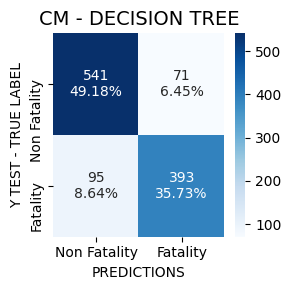

In [64]:
print('ACCURACY SCORES:', round(accuracy_score(y_test, prediction_t), 3))
print()
print('CLASSIFICATION REPORT:\n')
print(classification_report(y_test, prediction_t))

# Compute confusion matrix
cf_t_matrix = confusion_matrix(y_test, prediction_t)
group_counts = ["{0:0.0f}".format(value) for value in cf_t_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_t_matrix.flatten()/np.sum(cf_t_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(3,3))  
ax = sns.heatmap(cf_t_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('CM - DECISION TREE', size = 14)                   # Title
ax.set_xticklabels(labels = ("Non Fatality","Fatality"), size = 10)
ax.set_yticklabels(labels = ("Non Fatality","Fatality"), size = 10)
plt.ylabel('Y TEST - TRUE LABEL')
plt.xlabel('PREDICTIONS')
plt.tight_layout()
plt.show()

Higher percentage of False predictions. Lower accuracy, still a good result. 

### LOGISTIC REGRESSION

It is possible to use different numerical optimizers to find parameters including: `Newton-cg`, `Lbfgs`, `Liblinear`, `Sag` and `Saga` solvers. After testing these parameters, `liblinear` was chosen. 

In [65]:
log = LogisticRegression(C=0.01, solver='liblinear')
log.fit(X_train,y_train)
prediction_log =log.predict(X_test)

ACCURACY SCORE: 0.864

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       612
           1       0.87      0.82      0.84       488

    accuracy                           0.86      1100
   macro avg       0.86      0.86      0.86      1100
weighted avg       0.86      0.86      0.86      1100



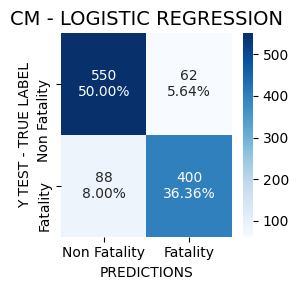

In [66]:
print('ACCURACY SCORE:',round(accuracy_score(y_test, prediction_log), 3))
print()
print('CLASSIFICATION REPORT:\n')
print(classification_report(y_test, prediction_log))

# Compute confusion matrix
cf_log_matrix = confusion_matrix(y_test, prediction_log)
group_counts = ["{0:0.0f}".format(value) for value in cf_log_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_log_matrix.flatten()/np.sum(cf_log_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(3,3))  
ax = sns.heatmap(cf_log_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('CM - LOGISTIC REGRESSION', size = 14)                   # Title
ax.set_xticklabels(labels = ("Non Fatality","Fatality"), size = 10)
ax.set_yticklabels(labels = ("Non Fatality","Fatality"), size = 10)
plt.ylabel('Y TEST - TRUE LABEL')
plt.xlabel('PREDICTIONS')
plt.tight_layout()
plt.show()

Higher percentage of False predictions with an even distribution. Lower accuracy, still a good result.

### Support Vector Machine

The mathematical function (kernel functions) `rbf` (Radial Basis Function) was used to map data into a higher dimensional space as it was the one that was performing better.

In [67]:
svm = svm.SVC(kernel='rbf')
svm.fit(X_train, y_train) 
prediction_svm = svm.predict(X_test)

ACCURACY SCORE: 0.936

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       612
           1       0.92      0.94      0.93       488

    accuracy                           0.94      1100
   macro avg       0.93      0.94      0.94      1100
weighted avg       0.94      0.94      0.94      1100



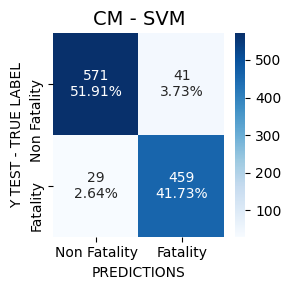

In [68]:
print('ACCURACY SCORE:', round(accuracy_score(y_test, prediction_svm), 3))
print()
print('CLASSIFICATION REPORT:\n')
print(classification_report(y_test, prediction_svm))

# Compute confusion matrix
cf_svm_matrix = confusion_matrix(y_test, prediction_svm)
group_counts = ["{0:0.0f}".format(value) for value in cf_svm_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_svm_matrix.flatten()/np.sum(cf_svm_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(3,3))  
ax = sns.heatmap(cf_svm_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('CM - SVM', size = 14)                   # Title
ax.set_xticklabels(labels = ("Non Fatality","Fatality"), size = 10)
ax.set_yticklabels(labels = ("Non Fatality","Fatality"), size = 10)
plt.ylabel('Y TEST - TRUE LABEL')
plt.xlabel('PREDICTIONS')
plt.tight_layout()
plt.show()

Higher percentage of False predictions. Lower accuracy, still a good result.

Model performances can be visually compared in the final plot.

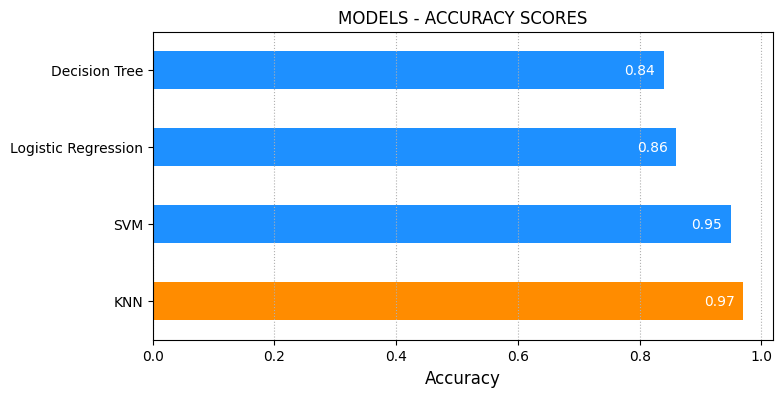

In [69]:
accs = {'Values':[0.97, 0.84, 0.86, 0.95]}                                # Dictionary, accuracy results
models = pd.DataFrame(accs, columns=["Values"], index = ["KNN", "Decision Tree", "Logistic Regression", "SVM"])
models.sort_values(["Values"], ascending=False, axis=0, inplace=True)         # Sort values, descending order                     
compare = models["Values"]                                                    # Pd.Series, format for plotting
compare.plot(kind='barh', figsize=(8, 4),                                    # Barh plot, size
             color=['darkorange', 'dodgerblue', 'dodgerblue', 'dodgerblue',]) # Individual bar colors      
plt.xlabel('Accuracy', size=12)                                               # Xlabel
plt.grid(axis='x',  linestyle=':')
plt.title('MODELS - ACCURACY SCORES', size=12)                                # Title

for index, value in enumerate(compare):                                       # Enumerate returns Index, values
    label = format(value)                                                     # Format the labels
    plt.annotate(label,                                                       # Annnotate: text to display
                 xy=(value - 0.065, index - 0.05),                             # Label positioning, x and y axis
                 color="white")  # Label color
plt.show()

# 7. Conclusions

In this project, the relationship between **accident severity** and data relating to the recorded accidents was analysed. The number of features contained in the dataset was reduced in relation to their significance for model creation. Co-dependencies amongst features were researched during the exploratory analysis phase.

The **labeled data** was imbalanced and to prepare the data for modelling it was `balanced out` and then `binarised`. The predictions of four different classification models were compared and the best one was chosen: the best model accuracy was very high (`97%` achieved using KNN algorithm). This high accuracy was confirmed by the `confusion matrix`, thus eliminating the suspect that the model was not equally predicting `True values`. This result is probably due to the fact that under-represented data was oversampled 10 times. This means that the dataset did not posses a great variety and that part of the `training set` already contained the data included in the `test set`.

The method used to collect some features deserves further investigation: it would be interesting to know how the information relating to **inattention** was obtained. I expect drivers to be reluctant to admit their inattention. For example, if they were not paying attention because they were using their mobiles while driving, the insurance company would not have covered their costs.

A further research would have to take into account of other information. It seems that the majority of the accidents took place when the **weather condition was clear**. It is not clear if this was due to the fact that drivers are generally more careful with bad weather or simply because the overall weather in Seattle is nice.

A different way of dealing with a **classification problem with imbalanced data** could have been maintaining the original four classes and use more **complex predictive models**. The ones used in this project were tested on the cleaned multi-class dataset and never returned an accuracy score higher than 50%. This type of solution will be implemented in future projects.

Data exploration revealed some interesting information that should be shared with the general population to increase their sense of awareness on the topic:

- The collision yearly distribution showed a downtrend from 2006 to 2010 followed by an uptrend and then another downtrend from 2015 to 2019. This means that there still a lot to do to address this issue.
- The highest rate of collisions took place in the `afternoon`, on `Fridays` and in `October`, `November`, `January` and `June`.
- Collisions wer more frequent at blocks and when a parked car is involved.
- Injuries were mainly the product of collisions at rear ended and angles.
- Fatalities peaked when accidents involved `pedestrians`.
- Unexpectedly, the majority of collisions took place with `clear weather conditions` (64.9%). `Raining and overcast conditions` together represented 34.3% of the total.
- The majority of the accidents took place when the road condition was `dry`, followed by wet conditions.
- `Daylight accidents` were the most frequent. The absence of light did not affect the severity distribution. 
- Collisions caused by drivers driving under the influence were less frequent, but this factor increased the collisions severity: `fatalities` +0.8%, `serious injuries` +2.8%, `injuries` +6.1%.
- Speeding increased the accident severity: `fatalities` +0.6%, `serious injuries` +1.9%, `injuries` + 7.2%.